# **pyCELP Intensity vs Electron Density** (recreates Schad & Dima (2020) Figure 3) 

 - written by Tom Schad 

In [1]:
import numpy as np
import pycelp
from scipy.io import readsav
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='rkbgym')
plt.rcParams['figure.dpi'] = 150
import os
## If you havent already set the environment variable XUVTOP for the location of the database, set it here
os.environ["XUVTOP"] = '/usr/local/ssw/packages/chianti/dbase/'

We first load reference data generated using the IDL version of Chianti Version 9. This was created using the genChiantiData.pro script, also available in this directory. 

In [2]:
savname = 'chianti_density_contfnc_data.sav'
print('savname: ',savname)
idls   = readsav(savname)
dens   = idls['dens']
levels = idls['levels']
rht    = idls['rht']
iontemps = idls['iontemps']
ch_int = np.copy(idls['ch_int']) ## units are  INT_UNITS   STRING   'photons cm-2 sr-1 s-1'
ch_int[:,:,0,:] = 1.  ## bad point at low density
sr2arcsec = (180./np.pi)**2.*3600.**2.
ch_int = ch_int / sr2arcsec

savname:  chianti_density_contfnc_data.sav


In [3]:
## create data array to hold the pyclep results that are like those in ch_int 
py_int = np.zeros_like(ch_int)

In [4]:
## do pycelp calculations for 27 levels 
fe14 = pycelp.Ion('fe_14',nlevels = 27)
fe13 = pycelp.Ion('fe_13',nlevels = 27)
fe11 = pycelp.Ion('fe_11',nlevels = 27)
si10 = pycelp.Ion('si_10',nlevels = 27)
si9 = pycelp.Ion('si_9',nlevels = 27)

 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.elvlc
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.wgfa
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.scups
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.psplups
 using default abundances: /usr/local/ssw/packages/chianti/dbase/abundance/sun_photospheric_2009_asplund.abund
 reading:  /usr/local/ssw/packages/chianti/dbase/abundance/sun_photospheric_2009_asplund.abund
 testing default file: /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq
 reading:  /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq
 setting up electron collision rate factors
 setting up proton  collision rate factors
 setting up non-dipole radiative rate factors
 getting non-dipole rate factors
 setting up dipole radiative rate factors
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_13/fe_13.elvlc
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_13/fe_13.wgfa
 reading:  /usr/

In [5]:
models = fe14,fe11,fe13,fe13,si10,si9
wvls = 5303,7892,10746,10798,14301,39343
rphot = rht-1.
thetab = np.rad2deg(np.arccos(1./np.sqrt(3.)))  ## Van Vleck

lev27 = 0

for n in range(6):
    for d,dens0 in enumerate(dens):
        ## with protons
        models[n].calc_rho_sym(dens0,iontemps[n],rphot,thetab,include_limbdark = False,include_protons = True)
        py_int[n,lev27,d,0]  = models[n].get_emissionLine(wvls[n]).calc_Iemiss()[0]/dens0 / 0.85 / dens0
        ## no protons
        models[n].calc_rho_sym(dens0,iontemps[n],rphot,thetab,include_limbdark = False,include_protons = False)
        py_int[n,lev27,d,1]  = models[n].get_emissionLine(wvls[n]).calc_Iemiss()[0]/dens0 / 0.85 / dens0

In [6]:
## do pycelp calculations for 100 levels 
fe14 = pycelp.Ion('fe_14',nlevels = 100)
fe13 = pycelp.Ion('fe_13',nlevels = 100)
fe11 = pycelp.Ion('fe_11',nlevels = 100)
si10 = pycelp.Ion('si_10',nlevels = 100)
si9 = pycelp.Ion('si_9',nlevels = 100)

 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.elvlc
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.wgfa
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.scups
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.psplups
 using default abundances: /usr/local/ssw/packages/chianti/dbase/abundance/sun_photospheric_2009_asplund.abund
 reading:  /usr/local/ssw/packages/chianti/dbase/abundance/sun_photospheric_2009_asplund.abund
 testing default file: /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq
 reading:  /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq
 setting up electron collision rate factors
 setting up proton  collision rate factors
 setting up non-dipole radiative rate factors
 getting non-dipole rate factors
 setting up dipole radiative rate factors
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_13/fe_13.elvlc
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_13/fe_13.wgfa
 reading:  /usr/

In [7]:
models = fe14,fe11,fe13,fe13,si10,si9
lev100 = 1
for n in range(6):
    for d,dens0 in enumerate(dens):
        ## with protons
        models[n].calc_rho_sym(dens0,iontemps[n],rphot,thetab,include_limbdark = False,include_protons = True)
        py_int[n,lev100,d,0]  = models[n].get_emissionLine(wvls[n]).calc_Iemiss()[0]/dens0 / 0.85 / dens0
        ## no protons
        models[n].calc_rho_sym(dens0,iontemps[n],rphot,thetab,include_limbdark = False,include_protons = False)
        py_int[n,lev100,d,1]  = models[n].get_emissionLine(wvls[n]).calc_Iemiss()[0]/dens0 / 0.85 / dens0

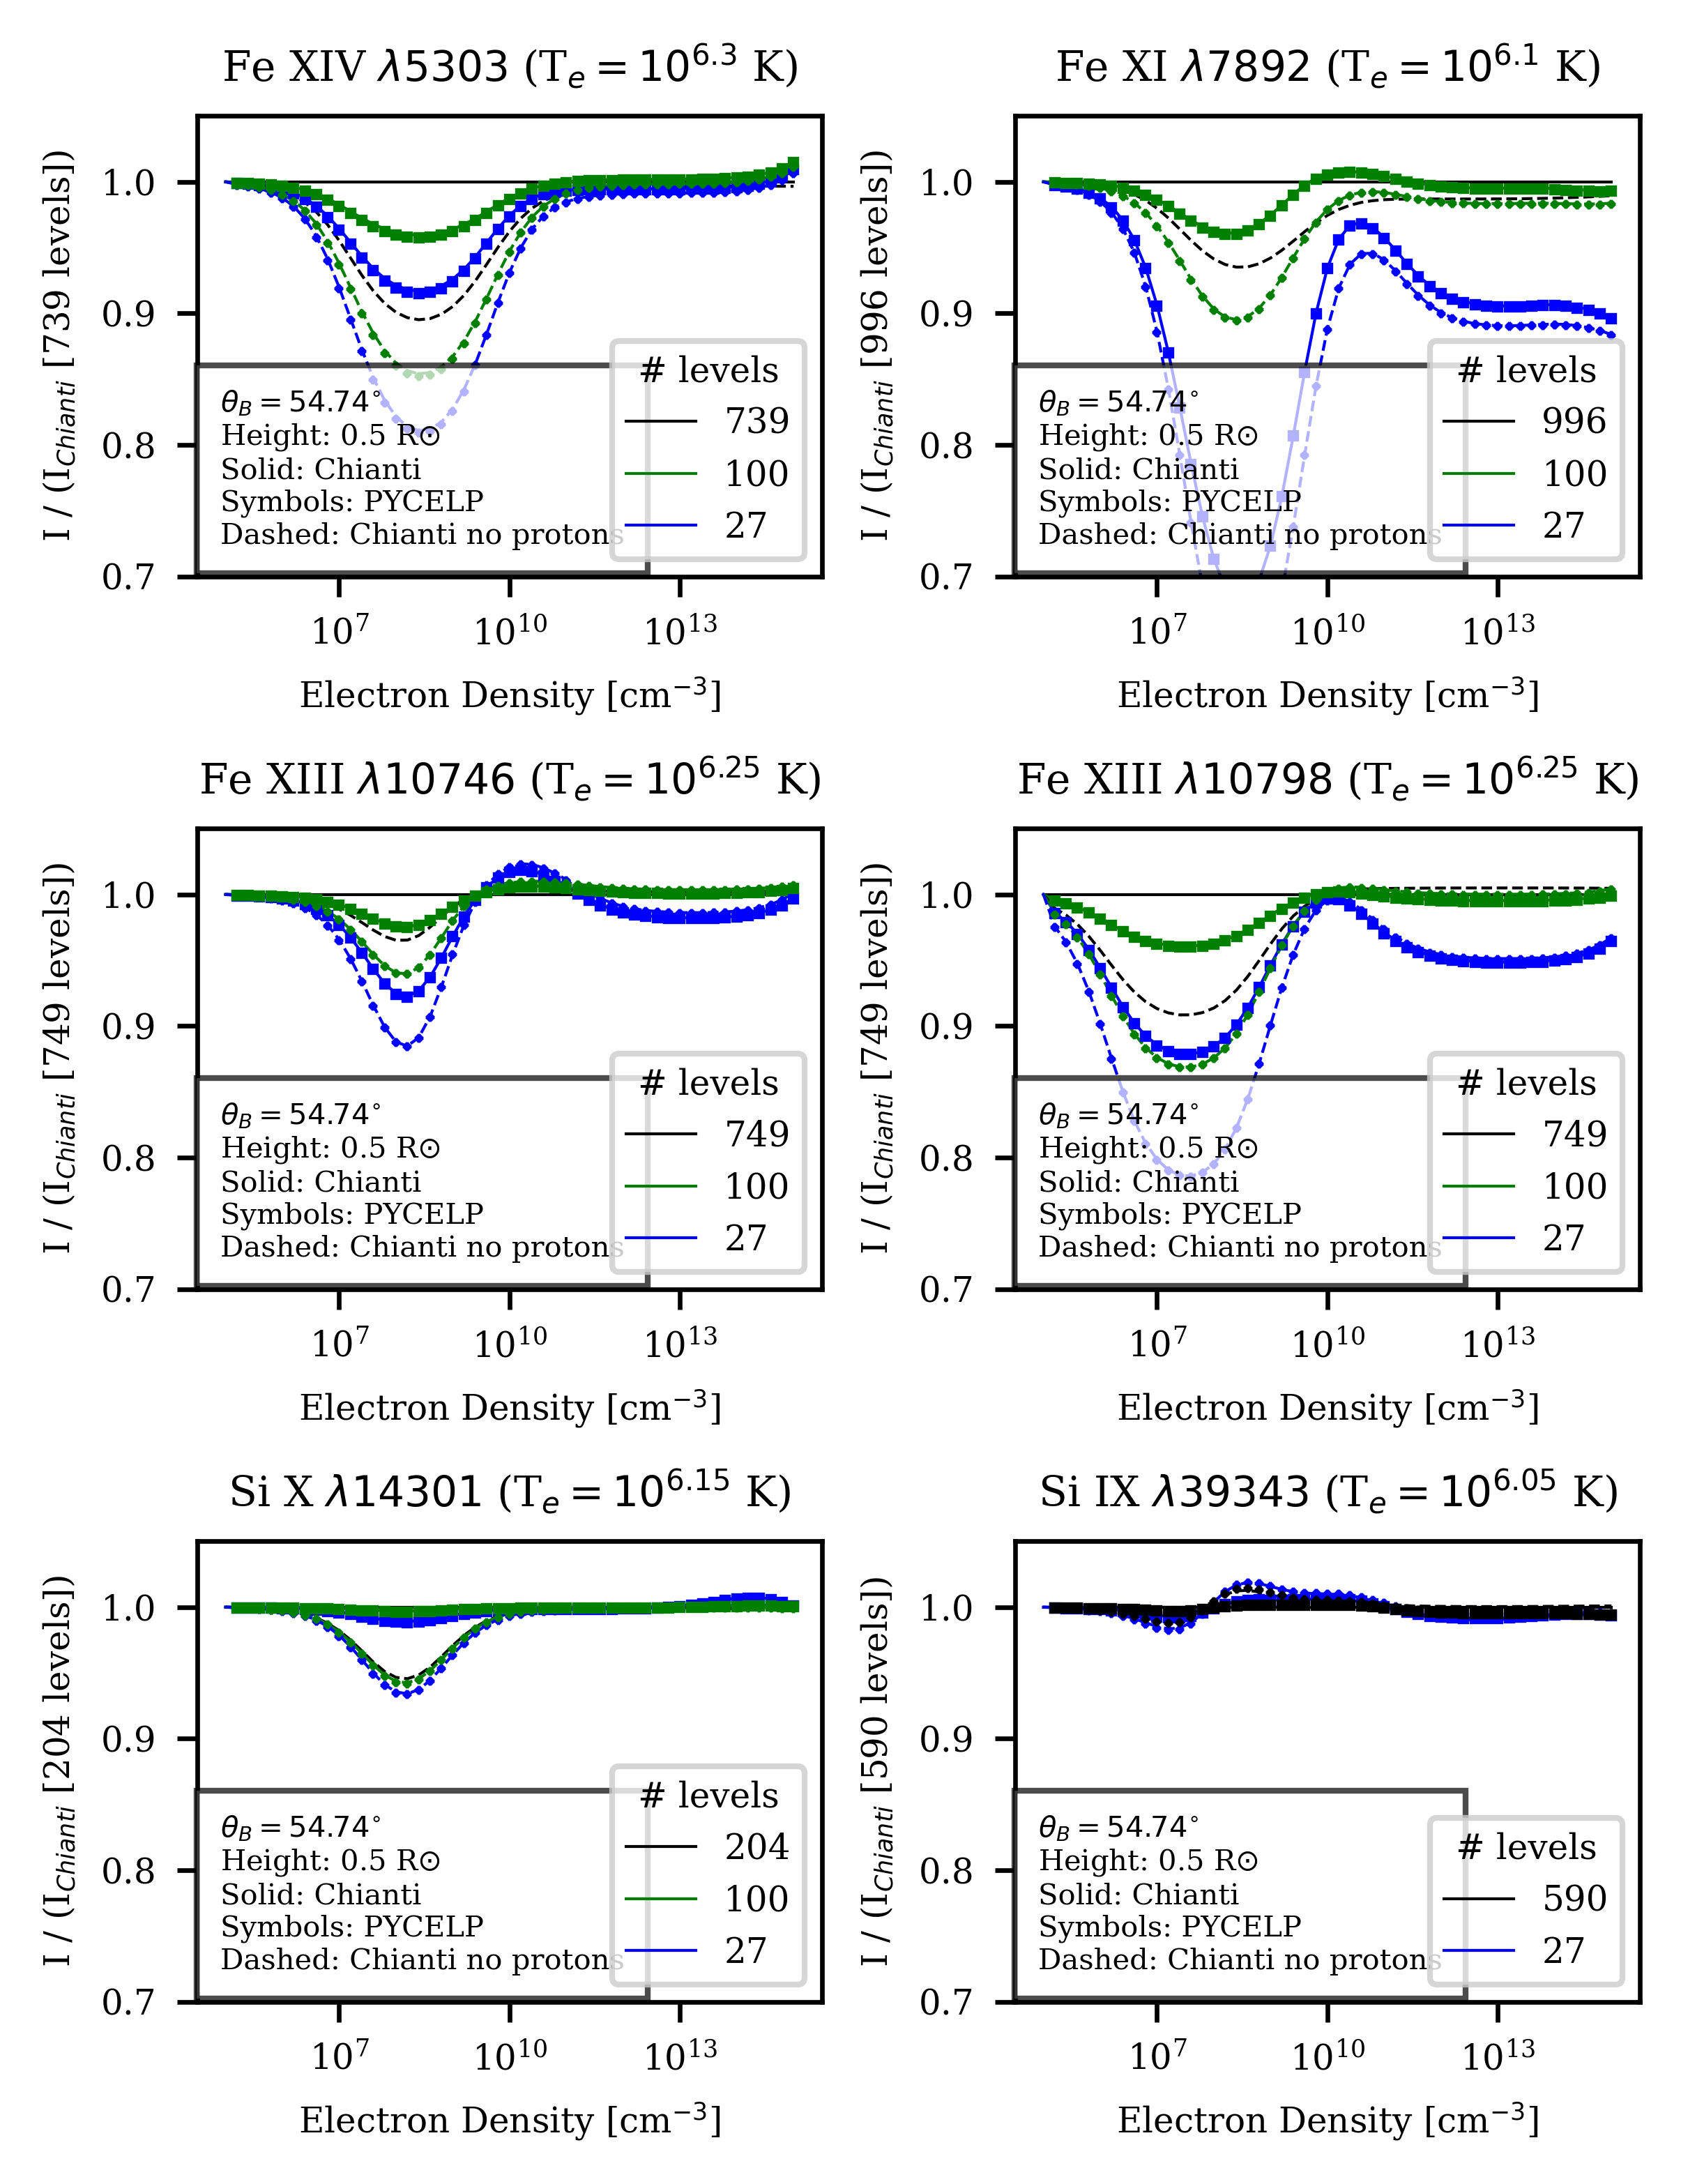

In [11]:
## PLOTTING 

titles = r'Fe XIV $\lambda5303$ (T$_{e} = 10^{6.3}$ K)', \
        r'Fe XI $\lambda7892$ (T$_{e} = 10^{6.1}$ K)', \
        r'Fe XIII $\lambda10746$ (T$_{e} = 10^{6.25}$ K)',\
        r'Fe XIII $\lambda10798$ (T$_{e} = 10^{6.25}$ K)',\
        r'Si X $\lambda14301$ (T$_{e} = 10^{6.15}$ K)',\
        r'Si IX $\lambda39343$ (T$_{e} = 10^{6.05}$ K)',

mpl.rcParams.update({
    "font.size":6,        
    "font.family": "serif",
    "font.sans-serif": ["Comic Sans MS"]})

width, height = plt.figaspect(1.3)
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(width,height), dpi=600)

ax = ax.flatten()


lw0 = 0.5
for n in range(6):
    ax[n].plot(dens,ch_int[n,2,:,0]/ch_int[n,2,:,0],color = 'black',lw = lw0,label = str(levels[n,2]))
    if n != 5: ax[n].plot(dens,ch_int[n,1,:,0]/ch_int[n,2,:,0],color = 'green',lw = lw0,label = str(levels[n,1]))
    ax[n].plot(dens,ch_int[n,0,:,0]/ch_int[n,2,:,0],color = 'blue',lw = lw0,label = str(levels[n,0]))
    ax[n].plot(dens,ch_int[n,2,:,1]/ch_int[n,2,:,0],color = 'black',linestyle = 'dashed',lw = lw0)
    if n != 5: ax[n].plot(dens,ch_int[n,1,:,1]/ch_int[n,2,:,0],color = 'green',linestyle = 'dashed',lw = lw0)
    ax[n].plot(dens,ch_int[n,0,:,1]/ch_int[n,2,:,0],color = 'blue',linestyle = 'dashed',lw = lw0)

    ## pycelp
    ax[n].plot(dens,py_int[n,0,:,0]/ch_int[n,2,:,0],'s',color = 'blue',fillstyle = 'none',markersize = 1)
    ax[n].plot(dens,py_int[n,0,:,1]/ch_int[n,2,:,0],'x',color = 'blue',fillstyle = 'none',markersize = 1)
    if n != 5: ax[n].plot(dens,py_int[n,1,:,0]/ch_int[n,2,:,0],'s',color = 'green',fillstyle = 'none',markersize = 1)
    if n != 5: ax[n].plot(dens,py_int[n,1,:,1]/ch_int[n,2,:,0],'x',color = 'green',fillstyle = 'none',markersize = 1)
    if n == 5: ax[n].plot(dens,py_int[n,1,:,0]/ch_int[n,2,:,0],'s',color = 'black',fillstyle = 'none',markersize = 1)
    if n == 5: ax[n].plot(dens,py_int[n,1,:,1]/ch_int[n,2,:,0],'x',color = 'black',fillstyle = 'none',markersize = 1)

    ## LABELS
    ax[n].set_xlabel(r'Electron Density [cm$^{-3}$]')
    ax[n].set_ylabel(r'I / (I$_{Chianti}$ [' + str(levels[n,2]) + ' levels])')
    ax[n].set_xscale('log')
    ax[n].set_ylim(0.7,1.05)
    ax[n].set_title(titles[n])
    ax[n].text(0.8e5,0.725,
       r"$\theta_{B} = 54.74^{\circ}$" "\n"
       r"Height: 0.5 R$\odot$" "\n"
       "Solid: Chianti" "\n"
       "Symbols: PYCELP" "\n"
       "Dashed: Chianti no protons", 
       bbox=dict(facecolor='white', alpha=0.7),fontsize = 5)
    ax[n].legend(loc = 'lower right',title = '# levels')

for z in range(5): fig.tight_layout()